# Wrapped ordinate (independent variable) AnalogSignalArrays
`WrappedEnvironments.ipynb`

Data description goes here.

Notebook was created by _Etienne Ackermann_.

In [24]:
import matplotlib.pyplot as plt

%matplotlib inline

In [25]:
import nelpy as nel
import nelpy.plotting as npl
import nelpy.examples as nex
import nelpy.generalized as ng

In [26]:
# load example data
data = wheel_avg_speed = nex.load_example_dataset('running-wheel')

timestamps = data.timestamps
linear_position = data.linear_position

In [31]:
pos = ng.AnalogSignalArray(abscissa_vals=timestamps, data=linear_position)
pos.support = pos.support.merge(gap=1)
pos._ordinate.is_wrapping = True
pos._ordinate.range = (0, 150)
pos._ordinate.base_unit = 'cm'
pos._ordinate.label = 'position on wheel {}'
# pos = pos.subsample(fs=pos.fs) # sanitize the gross irregularity of the signal; FFB! for smoothing etc.,
pos = pos.subsample(fs=10)

pos.wrap(inplace=True)

/home/etienne/Dropbox/code/nelpy/nelpy/generalized/_analogsignalarray.py:233: UserWarning: fs was not specified, so we try to estimate it from the data...
/home/etienne/Dropbox/code/nelpy/nelpy/generalized/_analogsignalarray.py:235: UserWarning: fs was estimated to be 165.8876760006328 Hz
/home/etienne/Dropbox/code/nelpy/nelpy/generalized/_analogsignalarray.py:415: UserWarning: creating support from abscissa_vals and sampling rate, fs!
/home/etienne/Dropbox/code/nelpy/nelpy/utils.py:720: UserWarning: some steps in the data are smaller than the requested step size.


<AnalogSignalArray at 0x7f734872ba90: 1 signals> for a total of 1:18:17:495 hours

(80, 180)

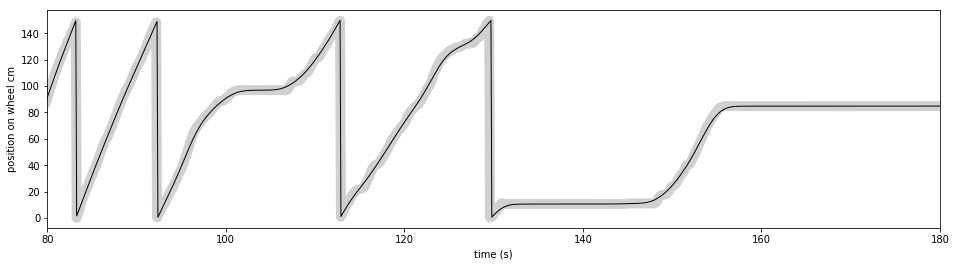

In [38]:
fig = plt.figure(figsize=(16,4))
npl.plot(pos, c='0.4', lw=10, alpha=0.3)
npl.plot(pos.smooth(sigma=1), c='0', lw=1)
plt.xlim(80,180)

# Old and uncurated below this point

We need some object, which is not strictly tied to time... and then we also need a wrapX and a wrapY object. Would we ever need a wrapXY object? perhaps... but that's a future goal.

We want something AnalogSignalesque, but with .x and .y accessors, which may or may not be wrapped

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import warnings

import nelpy as nel
import nelpy.plotting as npl

%matplotlib inline

warnings.filterwarnings("ignore")

/home/etienne/anaconda3/lib/python3.5/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: The mpl_toolkits.axes_grid module was deprecated in version 2.1. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist provies the same functionality instead.


In [2]:
from nelpy.contrib._ringlike import RinglikeTrajectory

In [3]:
test = RinglikeTrajectory(np.arange(0, 100, 3))
test.track_length = 13

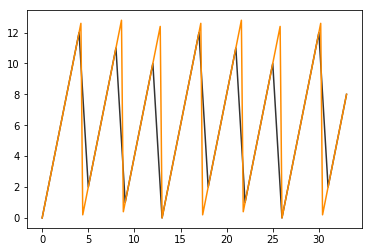

In [4]:
test.wrap()
npl.plot(test, c='0.2')
# npl.plot(test.downsample(fs_out=0.5), color='0.7')
# npl.plot(test.simplify(n_points=1000), color='k')
npl.plot(test.subsample(fs=5), c='darkorange')

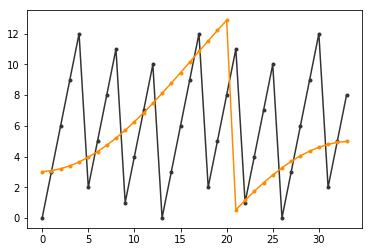

In [5]:
npl.plot(test,'.-', c='0.2')
npl.plot(test.smooth(sigma=20),'.-', c='darkorange')

In [6]:
jar = nel.load_pkl('example-data/runningwheel.nel')
for k in jar.keys:
    print(k)

angle_to_linpos
angular_position
lick_lin_position
lick_times
linear_position
motor_lin_position
motor_times
reward_position
silent_position
timestamps
tracklength
wheel_avg_speed


In [7]:
timestamps = jar.timestamps
lick_times = jar.lick_times
lick_lin_position = jar.lick_lin_position # unwrapped
wheel_avg_speed = jar.wheel_avg_speed
tracklength = jar.tracklength
motor_times = jar.motor_times
linear_position = jar.linear_position

In [8]:
pos1d = RinglikeTrajectory(linear_position, timestamps=timestamps)

pos1d._support = pos1d.support.merge(gap=1)
pos1d.track_length = tracklength
pos1d = pos1d.subsample(fs=10)

In [9]:
pos1d

<1D RinglikeTrajectory at 0x7fb38ba53eb8> for a total of 1:18:17:495 hours

In [10]:
pos1d.wrap()

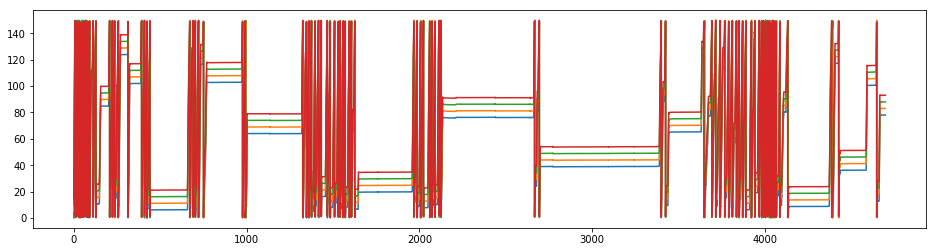

In [11]:
fig = plt.figure(figsize=(16,4))
npl.plot(pos1d)
npl.plot(pos1d.shift(5))
npl.plot(pos1d.shift(10))
npl.plot(pos1d.shift(15))

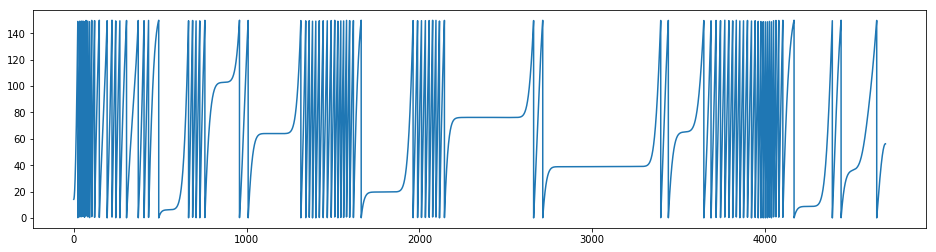

In [12]:
fig = plt.figure(figsize=(16,4))
npl.plot(pos1d.smooth(sigma=30))

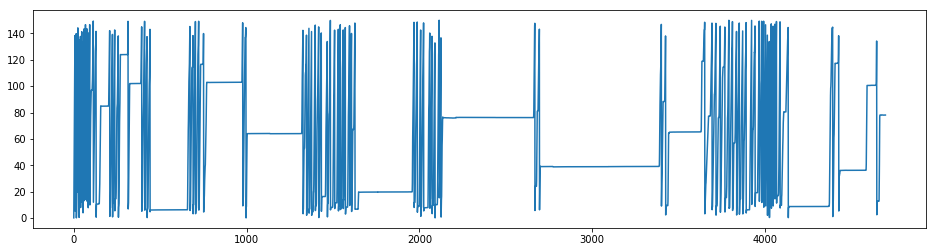

In [13]:
fig = plt.figure(figsize=(16,4))
npl.plot(pos1d.simplify())

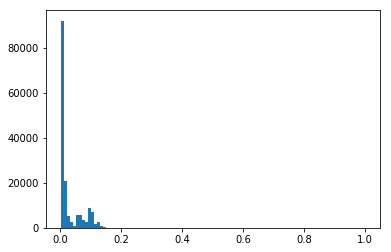

In [14]:
plt.hist(np.diff(timestamps), bins=100);

In [15]:
def get_trials_for_licks(pos, licks):
    """Get the timestamps corresponding to trials on the wheeeel.
    (C) Copyright 2018, Etienne Ackermann
    pos is RinglikeTrajectory
    licks is array
    """
    new_trial_times = pos._wraptimes()
    trials = np.zeros(len(licks))
    for tt in np.arange(1, len(new_trial_times)):
        trials[licks>new_trial_times[tt]] = tt
        
    return trials    

In [16]:
lickpos = pos1d(lick_times)
licktrial = get_trials_for_licks(pos1d, lick_times)

In [17]:
motorpos = pos1d(motor_times)
motortrial = get_trials_for_licks(pos1d, motor_times)

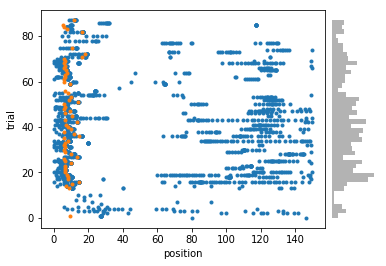

In [35]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

n_trials = len(pos1d._wraptimes())
plt.plot(lickpos, licktrial, '.', label='lick')
plt.plot(motorpos, motortrial, '.', label='pump')
plt.xlabel('position')
plt.ylabel('trial')
# plt.legend(loc=(1.05,0.85))

ax = plt.gca()

divider = make_axes_locatable(ax)
axHisty = divider.append_axes("right", size=0.6, pad=0.1)
axHisty.hist(licktrial, bins=n_trials//2, orientation='horizontal', facecolor='0.7')
# axHisty.hist(motortrial, bins=88, orientation='horizontal', facecolor='darkorange')
npl.utils.clear_left_right(axHisty)
npl.utils.clear_top_bottom(axHisty)
axHisty.set_ylim(ax.get_ylim());

In [19]:
posu = nel.PositionArray(pos1d)
model_position, model_speed = posu._kalman_smoother()
pos1d.unwrap()
lin_speed_raw = nel.utils.dxdt_AnalogSignalArray(pos1d).ydata.squeeze()
# for a good speed estimate, we need to smooth position, then estimate speed, and then smooth that estimate...
lin_speed = nel.utils.dxdt_AnalogSignalArray(pos1d.smooth(sigma=0.11)).smooth(sigma=0.35).ydata.squeeze()
pos1d.wrap()

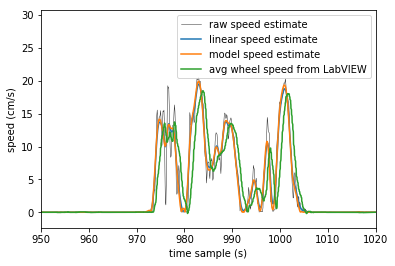

In [69]:
plt.plot(pos1d.time, lin_speed_raw, label='raw speed estimate', color='0.2', lw=0.5)
plt.plot(pos1d.time, lin_speed, label='linear speed estimate')
plt.plot(pos1d.time, model_speed.squeeze(), label='model speed estimate')
plt.plot(timestamps, wheel_avg_speed*100, label='avg wheel speed from LabVIEW')
ax = plt.gca()
ax.set_xlim(950,1020)
ax.set_ylabel('speed (cm/s)')
ax.set_xlabel('time sample (s)')
plt.legend()

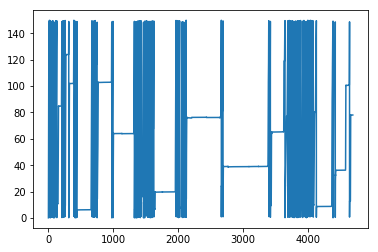

In [72]:
npl.plot(pos1d)

In [16]:
at = [40, 500, 700, 800, 1000, 1500, 1600]
before = 20
after = 40

In [41]:
import copy

def trialize(asa, *, at, before, after):
    
    #TODO consider resampling to get each trial with the same timestamps
    #TODO consider padding if we have different lengths in different trials
    #TODO input validation

    cuts = []
    for a in at:
        cut = [a-before, a+after]
        cuts.append(cut)
    cutter = nel.EpochArray(cuts)
    
    new_support = cutter[0] << cutter[0].start
    
    cut_asa = asa[cutter]
    new_asa = copy.deepcopy(asa)
    new_asa._support = new_support
    new_asa._ydata = cut_asa[0].ydata
    new_asa._time = cut_asa[0].time - cutter[0].start 
    
    for ydata in cut_asa._epochdata[1:]:
        new_asa._ydata = np.vstack((new_asa._ydata, ydata))

    return new_asa

In [46]:
tasa = trialize(nel.AnalogSignalArray(pos1d), at=at, before=before, after=after)
tasa

d:\dropbox\code\nelpy\nelpy\core\_analogsignalarray.py:632: UserWarning: ignoring signal outside of support


<AnalogSignalArray at 0x1f913b8e128: 7 signals> for a total of 1:00 minutes

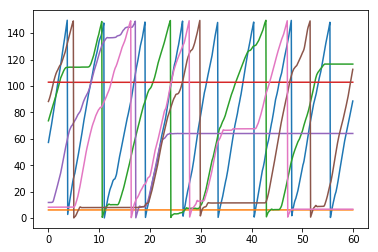

In [47]:
npl.plot(tasa)

In [49]:
# want: velocity as a function of position

# plan: (1)   compute velocity as function of time
#       (2.a) get position as a function of time
#       (2.b) unwrap position
#       (3)   build asa with timestamps=(2) and ydata=(1)
#       (4)   resample (equivalent to spatial binning)
#       (5)   trialize 

In [15]:
trial_epochs = pos1d._wrapepochs()

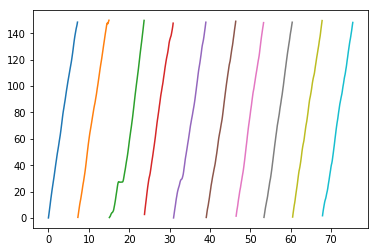

In [16]:
for snippet in pos1d[trial_epochs[:10]]:
    npl.plot(snippet)

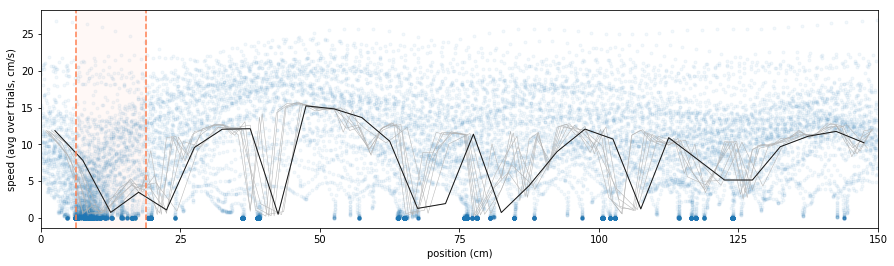

In [22]:
offset = 0

pos1d.unwrap()
pos2 = pos1d.shift(offset)
lin_speed = nel.utils.dxdt_AnalogSignalArray(pos2.smooth(sigma=0.11)).smooth(sigma=0.35)
pos1d.wrap()
pos2.wrap()

def avg_spd_by_position(speed, pos, n_bins=100):   
    bins = np.linspace(0,tracklength, n_bins+1)
    idx = np.digitize(pos.ydata.squeeze(), bins=bins, right=True)
    idx[idx==n_bins] = 0

    bincenters = bins[:-1] + np.diff(bins)/2

    # counts, _ = np.histogram(pos1d.ydata.squeeze(), bins=bins)
    # counts
    _
    counts = np.zeros(n_bins)
    speeds = np.zeros(n_bins)
    for idx, spd in zip(idx, speed.ydata.squeeze()):
        speeds[idx] += spd
        counts[idx] += 1

    counts[counts==0] = 1
#     plt.plot(bincenters, speeds/counts)
    
    return bincenters, speeds/counts

fig = plt.figure(figsize=(15,4))
plt.plot(pos2.ydata.squeeze(), lin_speed.ydata.squeeze(), '.', alpha=0.05)
plt.plot(*avg_spd_by_position(lin_speed, pos2, n_bins=30), lw=0.5, c='0.7')
plt.plot(*avg_spd_by_position(lin_speed, pos2, n_bins=40), lw=0.5, c='0.7')
plt.plot(*avg_spd_by_position(lin_speed, pos2, n_bins=50), lw=0.5, c='0.7')
plt.plot(*avg_spd_by_position(lin_speed, pos2, n_bins=60), lw=0.5, c='0.7')
plt.plot(*avg_spd_by_position(lin_speed, pos2, n_bins=70), lw=0.5, c='0.7')
plt.plot(*avg_spd_by_position(lin_speed, pos2, n_bins=80), lw=0.5, c='0.7')
plt.plot(*avg_spd_by_position(lin_speed, pos2, n_bins=90), lw=0.5, c='0.7')
# plt.plot(*avg_spd_by_position(lin_speed, pos2, n_bins=100), lw=1,  c='0.1')
plt.plot(*avg_spd_by_position(lin_speed, pos2, n_bins=30), lw=1,  c='0.1')

ax = plt.gca()

ax.axvline([offset+6.25], linestyle = '--',color = 'coral')
ax.axvline([offset+18.75], linestyle = '--',color = 'coral')
npl.epochplot(nel.EpochArray([offset+6.25, offset+18.75]), hatch='', color='coral', alpha=0.05)

ax.set_xlim(0,150)
ax.set_xlabel('position (cm)')
ax.set_ylabel('speed (avg over trials, cm/s)');
npl.utils.xticks_interval(25)

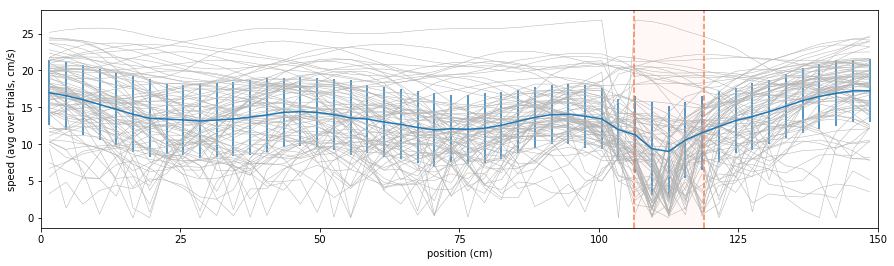

In [27]:
from scipy import stats

offset = 100
n_bins = 30

pos1d.unwrap()
pos2 = pos1d.shift(offset)
lin_speed = nel.utils.dxdt_AnalogSignalArray(pos2.smooth(sigma=0.11)).smooth(sigma=0.35)
pos1d.wrap()
pos2.wrap()

def avg_spd_by_position(speed, pos, n_bins=100):   
    bins = np.linspace(0,tracklength, n_bins+1)
    idx = np.digitize(pos.ydata.squeeze(), bins=bins, right=True)
    idx[idx==n_bins] = 0

    bincenters = bins[:-1] + np.diff(bins)/2

    # counts, _ = np.histogram(pos1d.ydata.squeeze(), bins=bins)
    # counts
    _
    counts = np.zeros(n_bins)
    speeds = np.zeros(n_bins)
    for idx, spd in zip(idx, speed.ydata.squeeze()):
        speeds[idx] += spd
        counts[idx] += 1

    counts[counts==0] = 1
#     plt.plot(bincenters, speeds/counts)
    
    return bincenters, speeds/counts

fig = plt.figure(figsize=(15,4))
trial = 0
speeds = []
for trial in np.arange(88):
    trial = int(trial)
    xbins, speed = avg_spd_by_position(lin_speed[trial_epochs][trial], pos2[trial_epochs][trial], n_bins=n_bins)
    speeds.append(speed)

plt.plot(xbins, np.array(speeds).T, c='0.7', lw=0.5)
# plt.errorbar(xbins, np.array(speeds).mean(axis=0), yerr=stats.sem(np.array(speeds)))
plt.errorbar(xbins, np.array(speeds).mean(axis=0), yerr=np.std(np.array(speeds), axis=0))
ax = plt.gca()

ax.axvline([offset+6.25], linestyle = '--',color = 'coral')
ax.axvline([offset+18.75], linestyle = '--',color = 'coral')
npl.epochplot(nel.EpochArray([offset+6.25, offset+18.75]), hatch='', color='coral', alpha=0.05)

ax.set_xlim(0,150)
ax.set_xlabel('position (cm)')
ax.set_ylabel('speed (avg over trials, cm/s)');
npl.utils.xticks_interval(25)

In [29]:
vel_std_re = np.std(np.array(speeds), axis=0)
vel_mu_re = np.array(speeds).mean(axis=0)

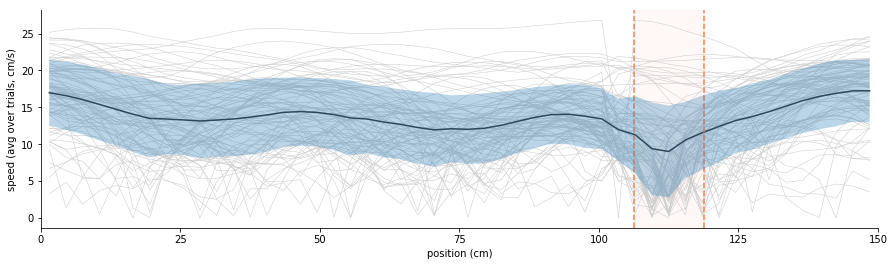

In [30]:
fig = plt.figure(figsize=(15,4))
plt.plot(xbins, np.array(speeds).T, c='0.8', lw=0.5)
plt.plot(xbins, vel_mu_re, c='0.2' )
plt.fill_between(xbins, vel_mu_re - vel_std_re, vel_mu_re + vel_std_re, alpha = 0.3, zorder=10)
ax = plt.gca()

ax.axvline([offset+6.25], linestyle = '--',color = 'coral')
ax.axvline([offset+18.75], linestyle = '--',color = 'coral')
npl.epochplot(nel.EpochArray([offset+6.25, offset+18.75]), hatch='', color='coral', alpha=0.05)

ax.set_xlim(0,150)
ax.set_xlabel('position (cm)')
ax.set_ylabel('speed (avg over trials, cm/s)');
npl.utils.xticks_interval(25)

import seaborn as sns

sns.despine()

# XXXXXX

However, it seems biased to estimate the speed by counting the number of temporal samples. We should probably rather compute the speed (as a function of position) for each trial, before then finally averaging over trials.

In [152]:
lin_speed.ydata.squeeze().max()

147.73094262504446

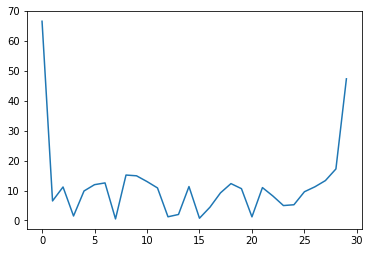

In [72]:
pos1d.unwrap()
lin_speed = nel.utils.dxdt_AnalogSignalArray(pos1d.smooth(sigma=0.11)).smooth(sigma=0.35)
new_asa = nel.AnalogSignalArray(ydata=lin_speed.ydata, timestamps=pos1d.ydata.squeeze())

d:\dropbox\code\nelpy\nelpy\core\_analogsignalarray.py:217: UserWarning: fs was not specified, so we try to estimate it from the data...
d:\dropbox\code\nelpy\nelpy\core\_analogsignalarray.py:218: RuntimeWarning: divide by zero encountered in double_scalars
d:\dropbox\code\nelpy\nelpy\core\_analogsignalarray.py:219: UserWarning: fs was estimated to be inf Hz
d:\dropbox\code\nelpy\nelpy\core\_analogsignalarray.py:358: UserWarning: Data is _not_ sorted! Data will be sorted automatically.
d:\dropbox\code\nelpy\nelpy\core\_analogsignalarray.py:386: UserWarning: creating support from time and sampling rate, fs!
d:\dropbox\code\nelpy\nelpy\core\_analogsignalarray.py:563: RuntimeWarning: divide by zero encountered in double_scalars
d:\dropbox\code\nelpy\nelpy\core\_analogsignalarray.py:397: RuntimeWarning: invalid value encountered in double_scalars


In [97]:
new_asa._support = nel.EpochArray([0,pos1d.max()])
nnn = new_asa.subsample(fs=10)

In [98]:
nnn

<AnalogSignalArray at 0x1f916dd2748: 1 signals> for a total of 3:41:18:217 hours

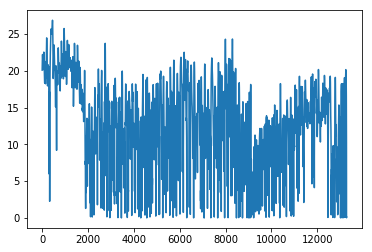

In [99]:
npl.plot(nnn)

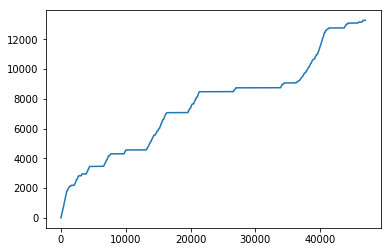

In [62]:
plt.plot(new_asa.time)

In [100]:
sss = trialize(nnn, at=[75, 225, 375, 525], before=75, after=75)

d:\dropbox\code\nelpy\nelpy\core\_analogsignalarray.py:632: UserWarning: ignoring signal outside of support


IndexError: index 0 is out of bounds for axis 0 with size 0